In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
sample = "CX113F"

df = pd.read_csv(f"./data/{sample}_comp.csv")
dog =  df[df["rname"].str.contains("dog")].sort_values(by="endpos", ascending=False)
print(np.shape(dog))
bear = df[df["rname"].str.contains("bear")].sort_values(by="endpos", ascending=False)
print(np.shape(bear))
df2 = pd.read_csv(f"./data/{sample}_q30.csv")
dog_min =  df2[df2["rname"].str.contains("dog")].sort_values(by="endpos", ascending=False)
print(np.shape(dog))
bear_min = df2[df2["rname"].str.contains("bear")].sort_values(by="endpos", ascending=False)
print(np.shape(bear))

(3268, 9)
(362, 9)
(3268, 9)
(362, 9)


In [48]:
### total reads dict
dict = {
"CX113C" : 85189435,
"CX113E" : 122730393,
"CX113F" : 73185240,
"CX113H" : 64548236,
"CX115H" : 101854526,
"CX1138" : 113670096,
"Neige_2_3" : 81278960,
"Neige_3_2" : 88475256,
"Neige_4" : 95450902
}
### q30 reads dict
dict2 = {
"CX113C" : 818025,
"CX113E" : 1,
"CX113F" : 1,
"CX113H" : 1,
"CX115H" : 1,
"CX1138" : 1,
"Neige_2_3" : 33352390,
"Neige_3_2" : 1,
"Neige_4" : 1
}

In [62]:
### basic mapping stats for all reads
mapped_dog = dog["numreads"].sum()
print("Number of reads mapped to dog: ", mapped_dog, "(", mapped_dog/dict[sample]*100, "%)")
mapped_bear = bear["numreads"].sum()
print("Number of reads mapped to bear: ", mapped_bear, "(", mapped_bear/dict[sample]*100, "%)")
unmapped = dict[sample] - mapped_dog - mapped_bear
print("Number of unmapped reads: ", unmapped, "(", unmapped/dict[sample]*100, "%)")

Number of reads mapped to dog:  30651660 ( 41.88229757803622 %)
Number of reads mapped to bear:  30936000 ( 42.27081854209947 %)
Number of unmapped reads:  11597580 ( 15.8468838798643 %)


In [65]:
stats_df = pd.DataFrame({
    "Sample": ["Neige_2_3", "CX113E", "Neige_4", "CX113C", "CX113F"],
    "Species": ["Wolf", "Bear", "Wolf", "Bear", "Wolf"],
    "Mapped \n to dog": [51826088, 53450844, 40660688, 35998900, 30651660],
    "Mapped \n to Dog %": [63.76, 43.55, 42.60, 42.26, 41.88],
    "Mapped \n to Bear": [20370208, 53337071, 41178739, 36381471, 30936000],
    "Mapped \n to Bear %": [25.06, 43.46, 43.14, 42.71, 42.27],
    "Unmapped": [9082664, 15942478, 13611475, 12809064, 11597580],
    "Unmapped %": [11.17, 12.99, 14.26, 15.04, 15.85]

})
stats_df

,Sample,Species,Mapped \n to dog,Mapped \n to Dog %,Mapped \n to Bear,Mapped \n to Bear %,Unmapped,Unmapped %
0,Neige_2_3,Wolf,51826088,63.76,20370208,25.06,9082664,11.17
1,CX113E,Bear,53450844,43.55,53337071,43.46,15942478,12.99
2,Neige_4,Wolf,40660688,42.60,41178739,43.14,13611475,14.26
3,CX113C,Bear,35998900,42.26,36381471,42.71,12809064,15.04
4,CX113F,Wolf,30651660,41.88,30936000,42.27,11597580,15.85


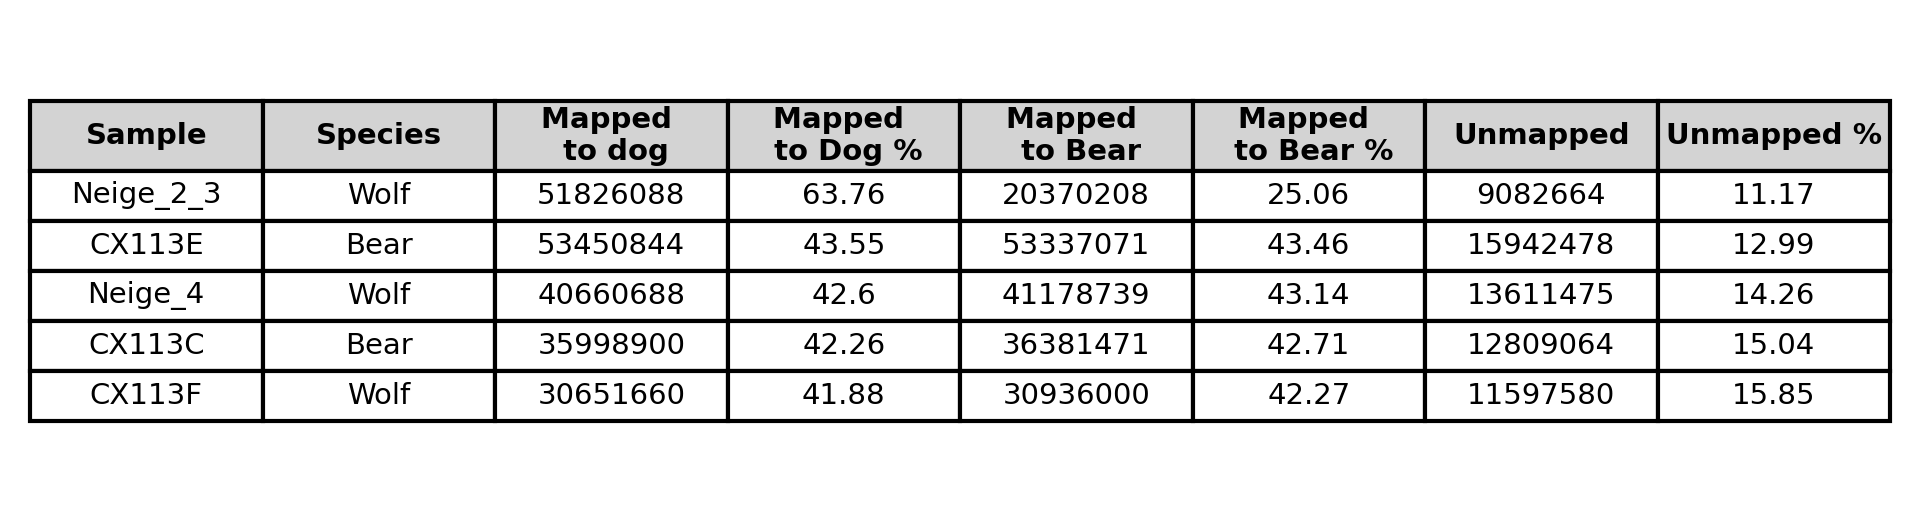

In [66]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 2), dpi=300)  # High resolution
ax.set_frame_on(False)  # Remove the figure frame
ax.xaxis.set_visible(False)  # Hide x-axis
ax.yaxis.set_visible(False)  # Hide y-axis

# Create a table
table = ax.table(
    cellText=stats_df.values,
    colLabels=stats_df.columns,
    cellLoc='center',
    loc='center',
    colColours=["lightgray"] * stats_df.shape[1]  # Header background color
)

# Format the table
table.auto_set_font_size(False)
table.set_fontsize(7)
table.auto_set_column_width(15)  # Adjust column width

# Make headers bold
for i in range(len(stats_df.columns)):
    table[0, i].set_text_props(weight='bold')

# Adjust the height of the header row (making it larger to fit two lines)
for i in range(len(stats_df.columns)):
    table[0, i].set_height(0.15)  # Set the height

# Save as high-quality image
plt.savefig("./figures/stats_table.png", bbox_inches="tight", dpi=300)
plt.show()


In [14]:
## basic mapping stats for q30 reads
mapped_dog_min = dog_min["numreads"].sum()
print("Number of q30 reads mapped to dog: ", mapped_dog_min, "(", mapped_dog_min/dict2[sample]*100, "%)")
mapped_bear_min = bear_min["numreads"].sum()
print("Number of q30 reads mapped to bear: ", mapped_bear_min, "(", mapped_bear_min/dict2[sample]*100, "%)")
unmapped_min = dict[sample] - mapped_dog_min - mapped_bear_min
print("Number of q30 unmapped reads: ", unmapped_min, "(", unmapped_min/dict2[sample]*100, "%)")

Number of q30 reads mapped to dog:  28933114 ( 86.74974716954317 %)
Number of q30 reads mapped to bear:  91372 ( 0.27395937742392673 %)
Number of q30 unmapped reads:  52254474 ( 156.67385155906368 %)


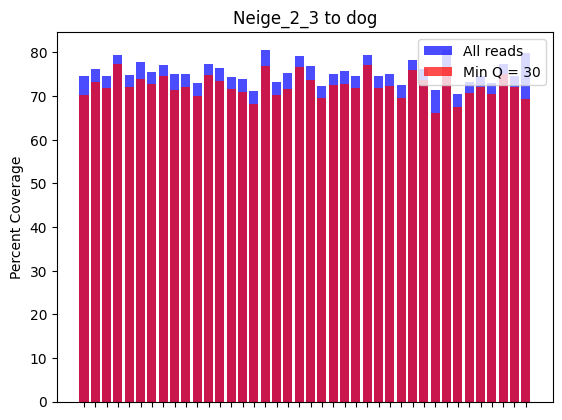

In [101]:
import matplotlib.pyplot as plt

# Set bar width
bar_width = 0.8

# Set positions for bars
x = np.arange(len(dog['rname'][0:40]))

# Create the figure and axis
fig, ax = plt.subplots()

# Plot bars
ax.bar(x, dog['coverage'][0:40], width=bar_width, label='All reads', alpha=0.7, color='b')
ax.bar(x, dog_min['coverage'][0:40], width=bar_width, label='Min Q = 30', alpha=0.7, color='r')

# Set labels and title
ax.set_xticks(x)
ax.set_xticklabels("")
ax.set_ylabel('Percent Coverage')
ax.set_title(f'{sample} to dog')

# Add legend
ax.legend()

# Show the plot
plt.show()

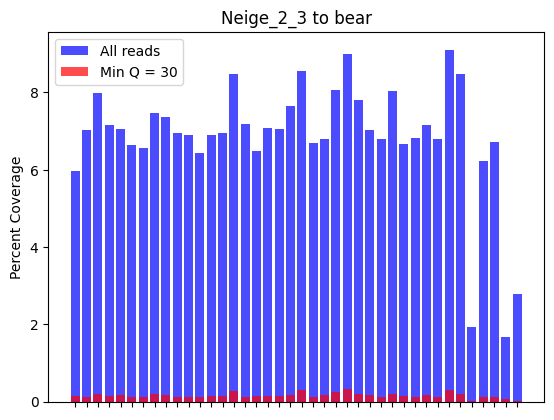

In [98]:
import matplotlib.pyplot as plt

# Set bar width
bar_width = 0.8

# Set positions for bars
x = np.arange(len(bear['rname'][0:40]))

# Create the figure and axis
fig, ax = plt.subplots()

# Plot bars
ax.bar(x, bear['coverage'][0:40], width=bar_width, label='All reads', alpha=0.7, color='b')
ax.bar(x, bear_min['coverage'][0:40], width=bar_width, label='Min Q = 30', alpha=0.7, color='r')

# Set labels and title
ax.set_xticks(x)
ax.set_xticklabels("")
ax.set_ylabel('Percent Coverage')
ax.set_title(f'{sample} to bear')

# Add legend
ax.legend()

# Show the plot
plt.show()

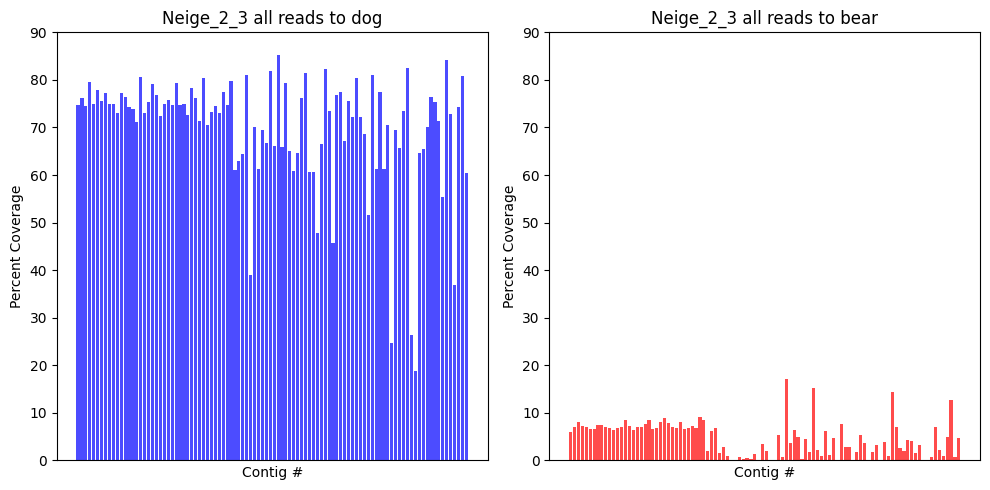

In [ ]:
import matplotlib.pyplot as plt

# Set bar width
bar_width = 0.8

# Set positions for bars
x = np.arange(100)
# Create the figure and axis
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot bars
axes[0].bar(x, dog['coverage'][0:100], width=bar_width, label='Dog', alpha=0.7, color='b')
axes[1].bar(x, bear['coverage'][0:100], width=bar_width, label='bear', alpha=0.7, color='r')

# Set labels and title
axes[0].set_xticks([])
axes[0].set_xticklabels("")
axes[0].set_ylabel('Percent Coverage')
axes[0].set_xlabel('Contig #')
axes[0].set_title(f'{sample} all reads to dog')
axes[0].set_ylim(0, 90)

axes[1].set_xticks([])
axes[1].set_xticklabels("")
axes[1].set_ylabel('Percent Coverage')
axes[1].set_xlabel('Contig #')
axes[1].set_title(f'{sample} all reads to bear')
axes[1].set_ylim(0, 90)

# Show the plot
plt.tight_layout()
plt.savefig(f"./figures/{sample}_pc_cov_all.png", dpi=600)
plt.show()

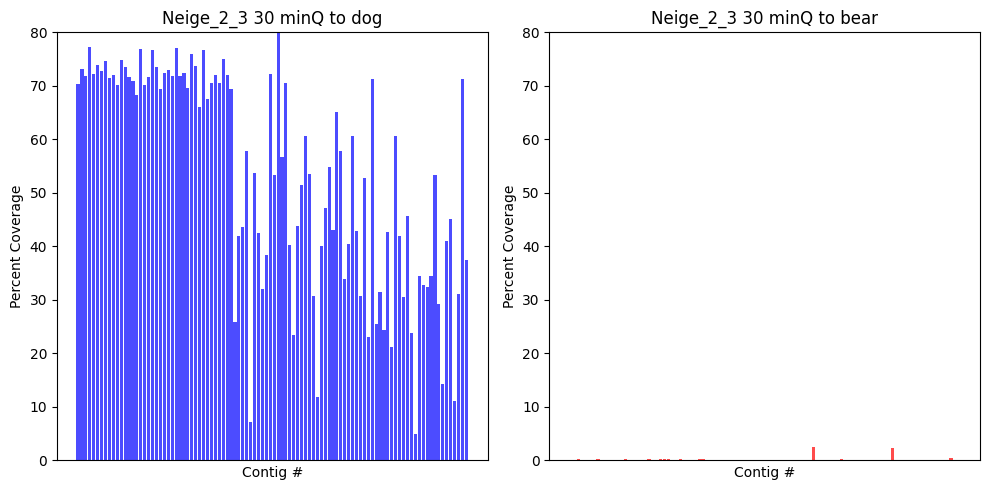

In [ ]:
import matplotlib.pyplot as plt

# Set bar width
bar_width = 0.8

# Set positions for bars
x = np.arange(100)
# Create the figure and axis
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot bars
axes[0].bar(x, dog_min['coverage'][0:100], width=bar_width, label='Dog', alpha=0.7, color='b')
axes[1].bar(x, bear_min['coverage'][0:100], width=bar_width, label='Bear', alpha=0.7, color='r')

# Set labels and title
axes[0].set_xticks([])
axes[0].set_xticklabels("")
axes[0].set_ylabel('Percent Coverage')
axes[0].set_xlabel('Contig #')
axes[0].set_title(f'{sample} 30 minQ to dog')
axes[0].set_ylim(0, 80)

axes[1].set_xticks([])
axes[1].set_xticklabels("")
axes[1].set_ylabel('Percent Coverage')
axes[1].set_xlabel('Contig #')
axes[1].set_title(f'{sample} 30 minQ to bear')
axes[1].set_ylim(0, 80)

# Show the plot
plt.tight_layout()
plt.savefig(f"./figures/{sample}_pc_cov_q30.png", dpi=600)
plt.show()